In [1]:
import numpy as np
from mfpml.optimization.sfbo import BayesOpt
from mfpml.problems.singlefidelity_functions import Forrester
from mfpml.optimization.sf_acqusitions import EI, LCB, PI
from mfpml.models.sf_gpr import Kriging
from mfpml.design_of_experiment.singlefideliy_samplers import LatinHyperCube


In [2]:
func = Forrester
print(func.optimum)
sampler = LatinHyperCube(design_space=func.design_space, seed=7)
# get samples
sample_x = sampler.get_samples(num_samples=3)
sample_y = func.f(sample_x)


-6.02074


In [3]:
# print(best_y, best_x)
model = Kriging(design_space=func.input_domain)
acf1 = PI()


In [4]:
opti = BayesOpt(problem=func)
opti.run_optimizer(
    surrogate=model,
    acquisition=acf1,
    max_iter=10,
    init_x=sample_x,
    init_y=sample_y,
)


iter:0 =====================================
best_y: -5.893617
best_x: [0.7414381]
iter:1 =====================================
best_y: -5.894341
best_x: [[0.7414844]]
iter:2 =====================================
best_y: -5.894341
best_x: [[0.7414844]]
iter:3 =====================================
best_y: -6.000503
best_x: [[0.75103612]]
iter:4 =====================================
best_y: -6.002947
best_x: [[0.75142683]]
iter:5 =====================================
best_y: -6.005011
best_x: [[0.75177784]]
iter:6 =====================================
best_y: -6.013062
best_x: [[0.75343583]]
iter:7 =====================================
best_y: -6.013062
best_x: [[0.75343583]]
iter:8 =====================================
best_y: -6.015311
best_x: [[0.75404544]]
iter:9 =====================================
best_y: -6.018115
best_x: [[0.75502436]]
iter:10 =====================================
best_y: -6.019524
best_x: [[0.75573612]]


(-6.0195235160664895, array([[0.75573612]]))

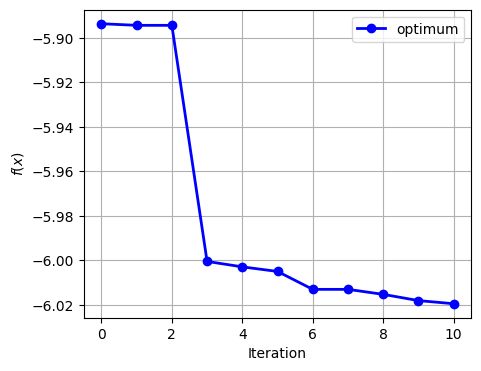

In [5]:
opti.plot_optimization_history(figsize=(5, 4))


In [6]:
print(opti.log)


OrderedDict([(0, (array([[0.12496818],
       [0.3675954 ],
       [0.7414381 ]]), array([[-0.93492019],
       [ 0.01688959],
       [-5.89361684]]))), (1, (array([[0.7414844]]), array([[-5.89434076]]))), (2, (array([[0.78615288]]), array([[-5.54251681]]))), (3, (array([[0.75103612]]), array([[-6.00050275]]))), (4, (array([[0.75142683]]), array([[-6.00294706]]))), (5, (array([[0.75177784]]), array([[-6.00501123]]))), (6, (array([[0.75343583]]), array([[-6.01306209]]))), (7, (array([[0.5537136]]), array([[0.8336797]]))), (8, (array([[0.75404544]]), array([[-6.01531116]]))), (9, (array([[0.75502436]]), array([[-6.01811473]]))), (10, (array([[0.75573612]]), array([[-6.01952352]])))])


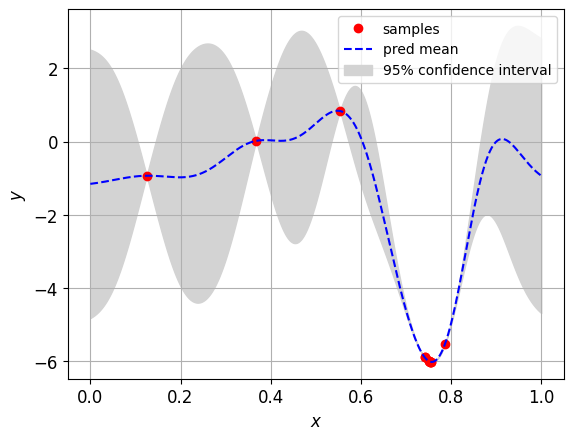

In [7]:
opti.surrogate.plot_prediction()
